In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from wordcloud import WordCloud
import spacy

In [1]:
from google.colab import files
upload=files.upload()

Saving twitter_training.csv to twitter_training.csv
Saving twitter_validation.csv to twitter_validation.csv


In [4]:
df_train=pd.read_csv('/content/twitter_training.csv')
df_val=pd.read_csv('/content/twitter_validation.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
df_train['Positive'].value_counts()

Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: Positive, dtype: int64

In [7]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

In [8]:
# Calculate class counts
class_counts = df_train['Positive'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

# Calculate the total number of images in train_df
total_images = len(df_train)

# Calculate the percentage for each class based on the total number of images
class_counts['Percentage'] = (class_counts['Count'] / total_images) * 100

# Sort the dataframe by count
class_counts = class_counts.sort_values(by='Count', ascending=False)




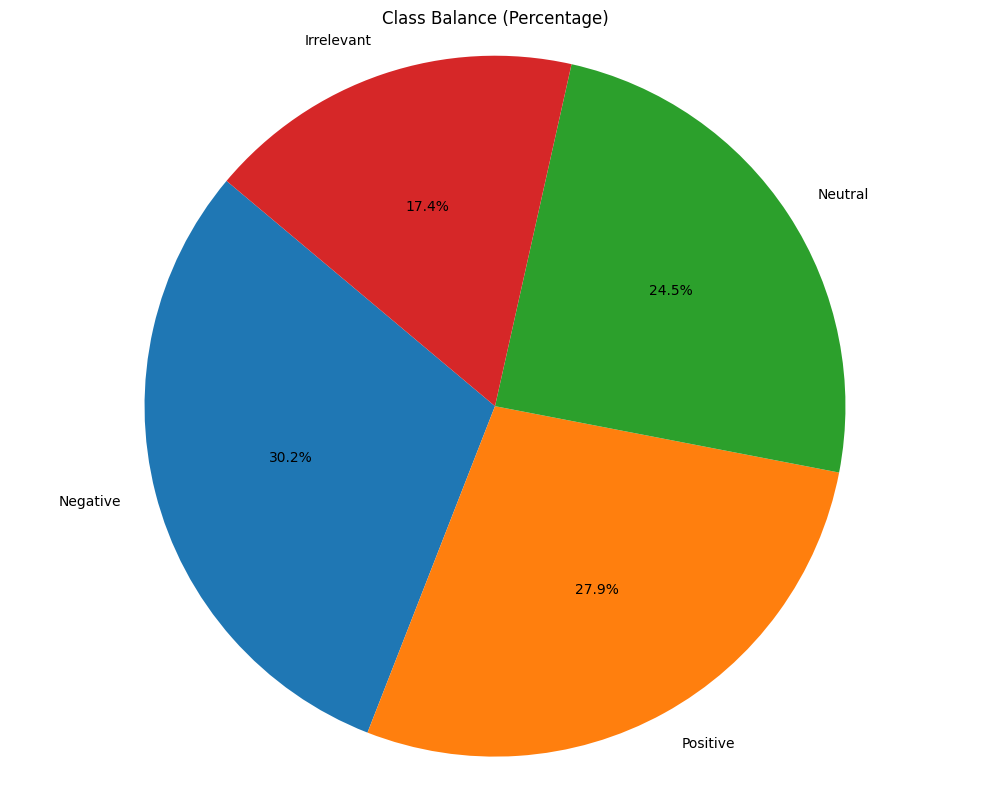

In [9]:
# Create the pie chart using matplotlib
plt.figure(figsize=(10, 8))
plt.pie(class_counts['Percentage'], labels=class_counts['Class'], autopct='%1.1f%%', startangle=140)
plt.title('Class Balance (Percentage)')
plt.axis('equal')
plt.tight_layout()
plt.show()

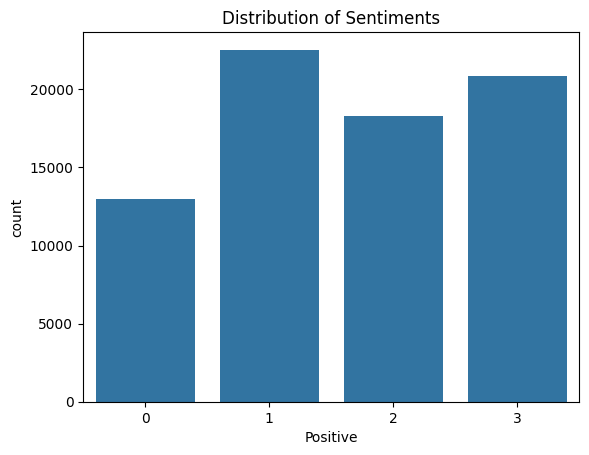

In [38]:
# Distribution of Sentiments
sns.countplot(data=df_train, x='Positive')
plt.title('Distribution of Sentiments')
plt.show()


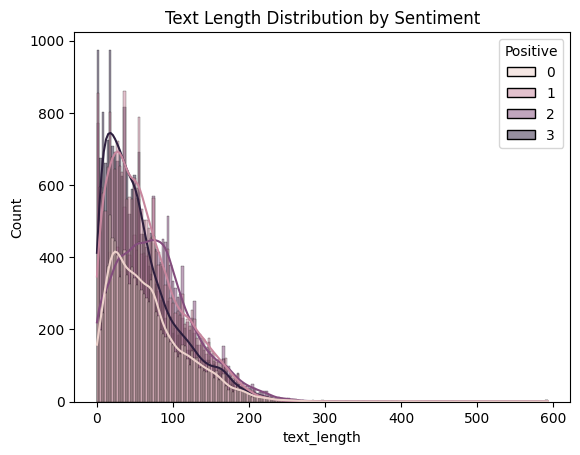

In [39]:
# Text Length Distribution
df_train['text_length'] = df_train['text'].apply(len)
sns.histplot(data=df_train, x='text_length', hue='Positive', kde=True)
plt.title('Text Length Distribution by Sentiment')
plt.show()

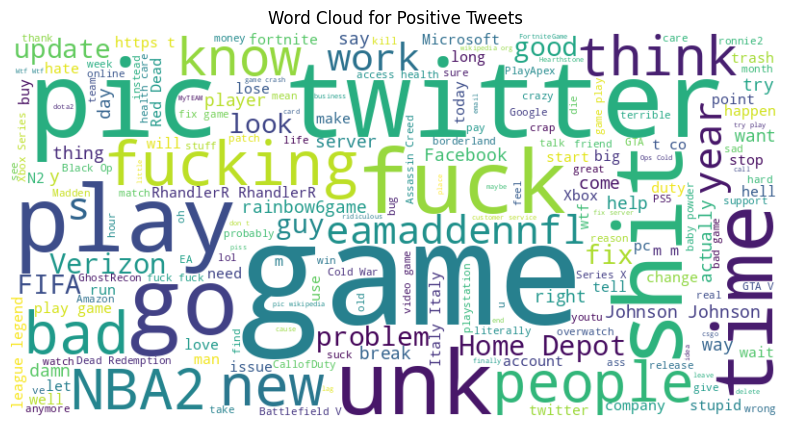

In [43]:
# Word Frequency Analysis (for each sentiment class)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_train[df_train['Positive'] == 1]['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Tweets')
plt.axis('off')
plt.show()

In [10]:
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    if pd.isnull(text):
        return ""
    doc = nlp(text)
    filtered_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(filtered_tokens)

In [11]:
df_train.rename(columns={"im getting on borderlands and i will murder you all ,": "text"}, inplace=True)

In [12]:
df_train['text']=df_train['text'].apply(preprocess)

In [13]:
df_train

,2401,Borderlands,Positive,text
0,2401,Borderlands,Positive,come border kill
1,2401,Borderlands,Positive,m get borderland kill
2,2401,Borderlands,Positive,m come borderland murder
3,2401,Borderlands,Positive,m get borderland 2 murder
4,2401,Borderlands,Positive,m get borderland murder
...,...,...,...,...
74676,9200,Nvidia,Positive,realize Windows partition Mac like 6 year Nvid...
74677,9200,Nvidia,Positive,realize Mac window partition 6 year Nvidia dri...
74678,9200,Nvidia,Positive,realize window partition Mac 6 year Nvidia dri...
74679,9200,Nvidia,Positive,realize window partition Mac like 6 year Nvidi...


In [14]:
le = LabelEncoder()
df_train['Positive'] = le.fit_transform(df_train['Positive'])

In [15]:
df_train=df_train.drop(['Borderlands','2401'],axis=1)
df_train

,Positive,text
0,3,come border kill
1,3,m get borderland kill
2,3,m come borderland murder
3,3,m get borderland 2 murder
4,3,m get borderland murder
...,...,...
74676,3,realize Windows partition Mac like 6 year Nvid...
74677,3,realize Mac window partition 6 year Nvidia dri...
74678,3,realize window partition Mac 6 year Nvidia dri...
74679,3,realize window partition Mac like 6 year Nvidi...


In [16]:
df_val=df_val.drop(['3364','Facebook'],axis=1)
df_val

,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
994,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,Positive,Today sucked so it’s time to drink wine n play...
997,Positive,Bought a fraction of Microsoft today. Small wins.


In [17]:
df_val.columns

Index(['Irrelevant', 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'], dtype='object')

In [18]:
df_val.rename(columns={"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣": "text"}, inplace=True)

In [20]:
df_val

,Irrelevant,text
0,Neutral,BBC News Amazon boss Jeff Bezos reject claim c...
1,Negative,@microsoft pay word function poorly @samsungu ...
2,Negative,csgo matchmaking closet hacking truly awful game
3,Neutral,President slap Americans face commit unlawful ...
4,Negative,hi @eahelp Madeleine McCann cellar past 13 yea...
...,...,...
994,Irrelevant,⭐ ️ Toronto art culture capital Canada wonder ...
995,Irrelevant,ACTUALLY good tot bring viewer \n\n people get...
996,Positive,today suck time drink wine n play borderland s...
997,Positive,buy fraction Microsoft today small win


In [19]:
df_val['text']=df_val['text'].apply(preprocess)
df_val

,Irrelevant,text
0,Neutral,BBC News Amazon boss Jeff Bezos reject claim c...
1,Negative,@microsoft pay word function poorly @samsungu ...
2,Negative,csgo matchmaking closet hacking truly awful game
3,Neutral,President slap Americans face commit unlawful ...
4,Negative,hi @eahelp Madeleine McCann cellar past 13 yea...
...,...,...
994,Irrelevant,⭐ ️ Toronto art culture capital Canada wonder ...
995,Irrelevant,ACTUALLY good tot bring viewer \n\n people get...
996,Positive,today suck time drink wine n play borderland s...
997,Positive,buy fraction Microsoft today small win


In [21]:
df_val['Irrelevant'] = le.fit_transform(df_val['Irrelevant'])
df_val

,Irrelevant,text
0,2,BBC News Amazon boss Jeff Bezos reject claim c...
1,1,@microsoft pay word function poorly @samsungu ...
2,1,csgo matchmaking closet hacking truly awful game
3,2,President slap Americans face commit unlawful ...
4,1,hi @eahelp Madeleine McCann cellar past 13 yea...
...,...,...
994,0,⭐ ️ Toronto art culture capital Canada wonder ...
995,0,ACTUALLY good tot bring viewer \n\n people get...
996,3,today suck time drink wine n play borderland s...
997,3,buy fraction Microsoft today small win


In [22]:
df_val.rename(columns={"Irrelevant": "Positive"}, inplace=True)

In [23]:
combined_df = pd.concat([df_train, df_val], ignore_index=True)
combined_df

,Positive,text
0,3,come border kill
1,3,m get borderland kill
2,3,m come borderland murder
3,3,m get borderland 2 murder
4,3,m get borderland murder
...,...,...
75675,0,⭐ ️ Toronto art culture capital Canada wonder ...
75676,0,ACTUALLY good tot bring viewer \n\n people get...
75677,3,today suck time drink wine n play borderland s...
75678,3,buy fraction Microsoft today small win


In [32]:
X_train, X_test, y_train, y_test = train_test_split(combined_df['text'], combined_df['Positive'],
                                                    test_size=0.2, random_state=42, stratify=combined_df['Positive'])

In [29]:
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('RandomForest', (RandomForestClassifier()))
])

In [30]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('RandomForest', RandomForestClassifier())])

In [31]:
pred = clf.predict(X_test)
print(accuracy_score(y_test, pred))

0.9070428118393234
